# Curso estatísticas com python parte 4: Correlação e Regressão

## Bibliotecas

In [1]:
import pandas           as pd 
import numpy            as np 
import seaborn          as sns
import statsmodels.api  as sm

from scipy.stats import t as t_student
from scipy.stats import f as f_test

## Unidade 1: A primeira regressão

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 
    3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100,
     2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [4]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


<AxesSubplot:title={'center':'Box plot'}, xlabel='Renda das Famílias', ylabel='Gasto das Famílias'>

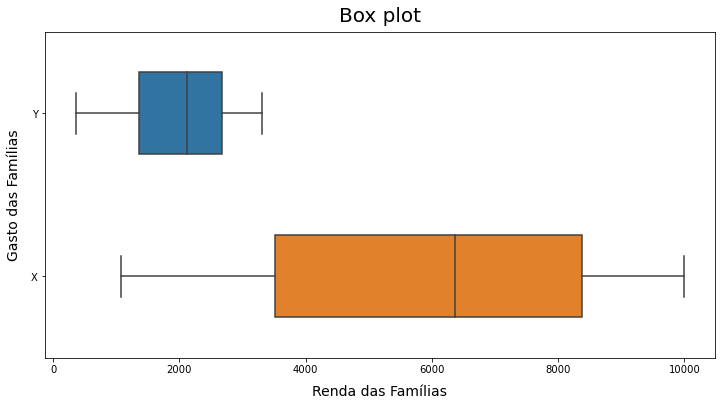

In [5]:
eixo = sns.boxplot(data = dataset, orient = 'h', width = 0.5)
eixo.figure.set_size_inches(12,6)
eixo.set_title('Box plot', fontsize = 20, pad = 10)
eixo.set_xlabel('Renda das Famílias', fontsize = 14, labelpad = 10)
eixo.set_ylabel('Gasto das Famílias', fontsize = 14, labelpad = 10)
eixo

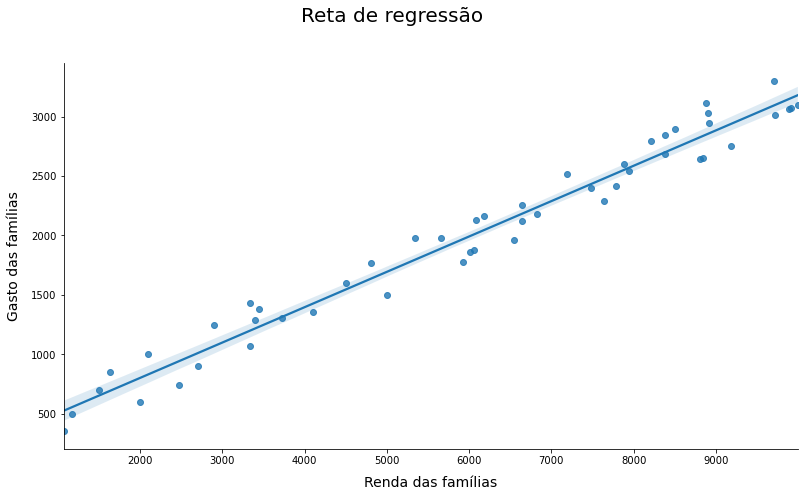

In [6]:
eixo = sns.lmplot(x = 'X', y = 'Y', data = dataset)
eixo.fig.set_size_inches(12,6)
eixo.fig.suptitle('Reta de regressão', fontsize = 20, y = 1.1)
eixo.set_xlabels('Renda das famílias', fontsize = 14, labelpad = 10)
eixo.set_ylabels('Gasto das famílias', fontsize = 14, labelpad = 10)
eixo

In [7]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [8]:
Y = dataset.Y 
X = sm.add_constant(dataset.X)

In [9]:
resultado_regressao = sm.OLS(Y, X).fit()

In [10]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.56e-38
Time:                        19:54:40   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [11]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


## Unidade 2: Entendendo a covariância

In [12]:
amostras = dados.query('Renda < 5000').sample(n = 20, random_state = 101)

In [13]:
print(amostras[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov().round(2))

                  Idade      Renda  Anos de Estudo  Altura
Idade            134.41   -4947.97          -16.41    0.02
Renda          -4947.97  764668.33         2209.02   -7.14
Anos de Estudo   -16.41    2209.02           16.94    0.11
Altura             0.02      -7.14            0.11    0.00


In [14]:
amostras.Idade.var()

134.4105263157895

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


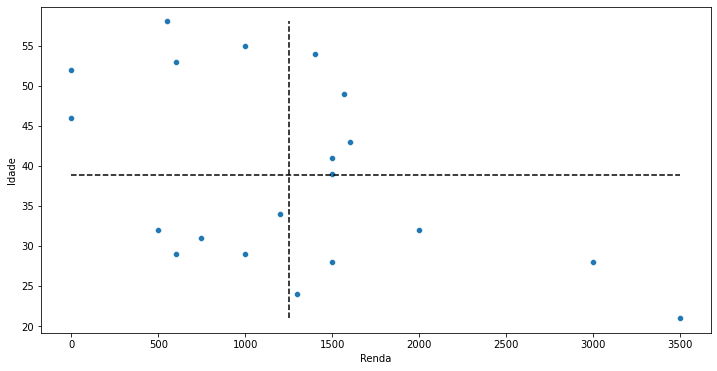

In [15]:
x = amostras.Renda
y = amostras.Idade

# Gráfico
eixo = sns.scatterplot(x,y)
eixo.figure.set_size_inches(12,6)
eixo.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors = 'black', linestyles = 'dashed')
eixo.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors = 'black', linestyles = 'dashed')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


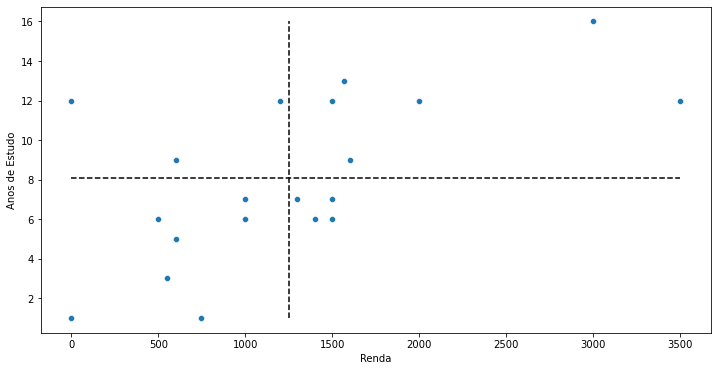

In [16]:
x = amostras.Renda
y = amostras['Anos de Estudo']

# Gráfico
eixo = sns.scatterplot(x,y)
eixo.figure.set_size_inches(12,6)
eixo.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors = 'black', linestyles = 'dashed')
eixo.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors = 'black', linestyles = 'dashed')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


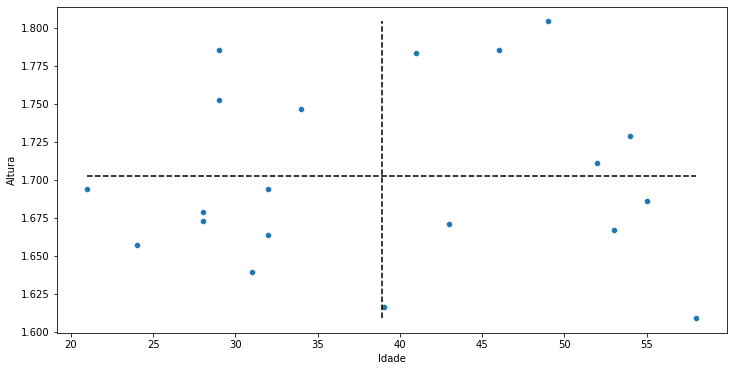

In [17]:
x = amostras.Idade
y = amostras.Altura

# Gráfico
eixo = sns.scatterplot(x, y)
eixo.figure.set_size_inches(12, 6)
eixo.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
eixo.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

In [18]:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [19]:
s_xy = s_xy.Altura.loc['Renda']
s_xy.round(2)

-1.08

In [20]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

In [21]:
r_xy = s_xy / (s_x * s_y)
r_xy.round(4)

-0.0041

In [22]:
print(dados[['Altura', 'Renda']].corr().round(4))

        Altura   Renda
Altura  1.0000 -0.0041
Renda  -0.0041  1.0000


In [23]:
print(dataset[['Y','X']].corr().round(4))

        Y       X
Y  1.0000  0.9848
X  0.9848  1.0000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


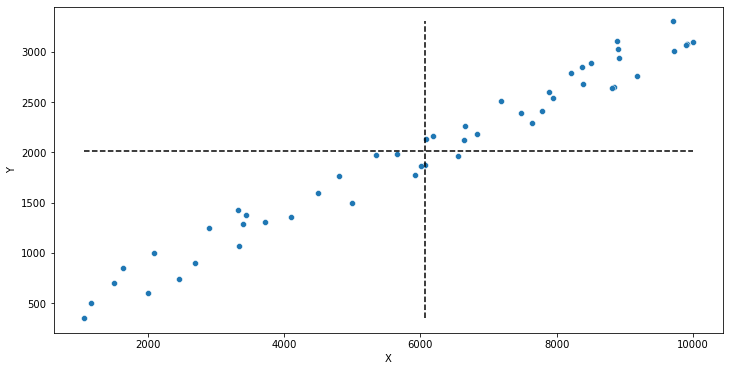

In [24]:
x = dataset.X
y = dataset.Y 

# Gráfico
eixo = sns.scatterplot(x,y)
eixo.figure.set_size_inches(12,6)
eixo.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors = 'k', linestyles = 'dashed')
eixo.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors = 'k', linestyles = 'dashed')

### Exercício

In [25]:
oxy = 2178803.59
ox2 = 7328865.85
oy2 = 667839.78

s_x = np.sqrt(ox2)
s_y = np.sqrt(oy2)

r_xy = oxy / (s_x * s_y)
print('Correlação: ' + '%0.4f' % r_xy)

Correlação: 0.9848


## Unidade 3: Usando regressão linear

In [26]:
dataset.drop(columns = ['Y_previsto'], inplace = True)
print(dataset.corr())

          Y         X
Y  1.000000  0.984835
X  0.984835  1.000000


In [27]:
n = len(dataset)
soma_y = dataset.Y.sum()
soma_x = dataset.X.sum()

In [28]:
soma_x2 = dataset.X.apply(lambda x: x**2).sum()
soma_y2 = dataset.Y.apply(lambda y: y**2).sum()
soma_xy = (dataset.X * dataset.Y).sum() 

In [29]:
numerador = n * soma_xy - (soma_x * soma_y)
denominador = (n* soma_x2) - (np.square(soma_x))
beta_2 = numerador / denominador
print(beta_2.round(4)) 

0.2973


In [30]:
beta_1 = dataset.Y.mean() - (beta_2 * dataset.X.mean())
print(beta_1.round(4)) 

207.9033


In [31]:
Y = dataset.Y 
X = sm.add_constant(dataset.X) 

In [32]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()
beta_1 = resultado_regressao.params[0]
beta_2 = resultado_regressao.params[1]
print(beta_1.round(4))
print(beta_2.round(4)) 

207.9033
0.2973


In [33]:
# Limite inteferior e superior
print(resultado_regressao.conf_int(alpha = 0.05)) 

                0           1
const  107.116864  308.689763
X        0.282092    0.312490


In [34]:
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X
dataset.head() 

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [35]:
dataset['Y_previsto_sm'] = resultado_regressao.predict()
dataset.head() 

,Y,X,Y_previsto,Y_previsto_sm
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [36]:
dataset.drop(['Y_previsto_sm'], axis = 1, inplace = True) 

In [37]:
def prever(x):
    return beta_1 + beta_2 * x


prever(9714) 

3095.785086090602

In [38]:
resultado_regressao.predict([1,9714])[0] 

3095.785086090602

Onde temos o número de domicílios que possuem computador (Y) e a renda total recebida por pessoas de 10 anos ou mais (X), em cada um dos estados brasileiros.

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

Neste problema, precisamos, inicialmente, obter as estimativas dos parâmetros de regressão.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para obter os parâmetros.

Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

In [39]:
exercicio = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
exercicio = pd.DataFrame(data = exercicio) 

,Y,X,Y_previsto,U
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [40]:
Y = exercicio.Y
X = sm.add_constant(exercicio.X)
resultado_regressao_ex = sm.OLS(Y, X, missing = 'drop').fit()
betinha_1 = resultado_regressao_ex.params[0]
betinha_2 = resultado_regressao_ex.params[1]
print(betinha_1.round(4))
print(betinha_2.round(4)) 

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


Considerando os dados do problema anterior, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias, após estimarmos o modelo (problema anterior), suponha que seja criado um estado e que este apresente uma renda total de R$ 2.345.678.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.

Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

    Y é o número de domicílios que possuem computador
    X é a renda total recebida por pessoas de 10 anos ou mais, em cada um dos estados brasileiros

<AxesSubplot:title={'center':'Residuos vs Y_previsto'}, xlabel='Y previsto', ylabel='Resíduos'>

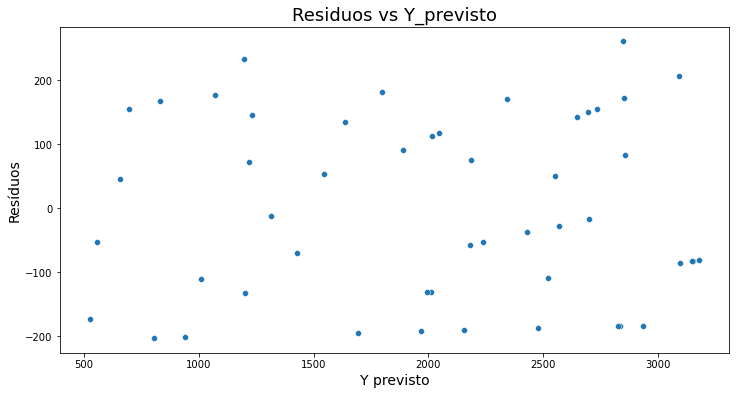

In [42]:
previsao = resultado_regressao_ex.predict([1, 2.345678])[0]
print(previsao.round(0)) 

## Unidade 4: Testando resultados

In [44]:
dataset['U'] = dataset.Y - dataset.Y_previsto
dataset.head()

In [45]:
dataset.drop(['U'], axis=1, inplace=True)

dataset['Residuos'] = resultado_regressao.resid
dataset.head() 


In [46]:
eixo = sns.scatterplot(x = dataset.X, y = dataset.Residuos)
eixo.figure.set_size_inches(12,6)
eixo.set_title('Residuos vs Variável Independente', fontsize = 18)
eixo.set_xlabel('X', fontsize = 14)
eixo.set_ylabel('Resíduos', fontsize = 14)
eixo 

In [47]:
eixo = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
eixo.figure.set_size_inches(12, 6)
eixo.set_title('Residuos vs Y_previsto', fontsize=18)
eixo.set_xlabel('Y previsto', fontsize=14)
eixo.set_ylabel('Resíduos', fontsize=14)
eixo 

In [48]:
print(resultado_regressao.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.56e-38
Time:                        19:54:46   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [49]:
# Erro quadrático médio - estimativa o² - mean error squares
EQM = SQE / (n - 2)
print(EQM.round(2)) 
print(resultado_regressao.mse_resid.round(2)) 

20520.54
20520.54


In [50]:
# Teste de significância de parâmetros
s = np.sqrt(resultado_regressao.mse_resid)
soma_desvio2 = dataset.X.apply(lambda x: np.square(x - dataset.X.mean())).sum()
s_beta2= s / np.sqrt(soma_desvio2)
print(s_beta2) 

0.00755923753376846


In [51]:
# Teste de hipótese T
confianca = 0.95
significancia = 1 - confianca
graus_liberdade = resultado_regressao.df_resid
probabilidade = (0.5 + (confianca / 2)) 

In [52]:
t_alfa_2 = t_student.ppf(probabilidade, graus_liberdade)
print(t_alfa_2.round(4)) 

2.0106


In [53]:
tezao = (beta_2 - 0) / s_beta2
print(tezao)
print(resultado_regressao.tvalues[1]) 

39.328131926755
39.328131926755


In [54]:
if(tezao >= t_alfa_2):
    print('Rejeita-se hipótese nula')
else:
    print('Hipótese nula') 

Rejeita-se hipótese nula


In [55]:
p_valor = 2 *(t_student.sf(tezao,graus_liberdade))
print(p_valor)
print(resultado_regressao.pvalues[1]) 

3.555543228586039e-38
3.555543228586039e-38


In [56]:
# Teste de significância conjunta dos parâmetros
numerador = resultado_regressao.mse_model
denominador = resultado_regressao.mse_resid
fzao = numerador / denominador
print(fzao.round(2)) 

1546.7


In [57]:
fzao = resultado_regressao.fvalue
p_valor = resultado_regressao.f_pvalue
print(fzao)
print(p_valor) 

1546.7019608482476
3.5555432285859935e-38


In [58]:
p_valor = f_test.sf(fzao, 1, (n-2))
print(p_valor) 

3.5555432285859935e-38


## Exercício

<AxesSubplot:title={'center':'Residuos vs Y_previsto'}, xlabel='Y previsto', ylabel='Resíduos ao quadrado'>

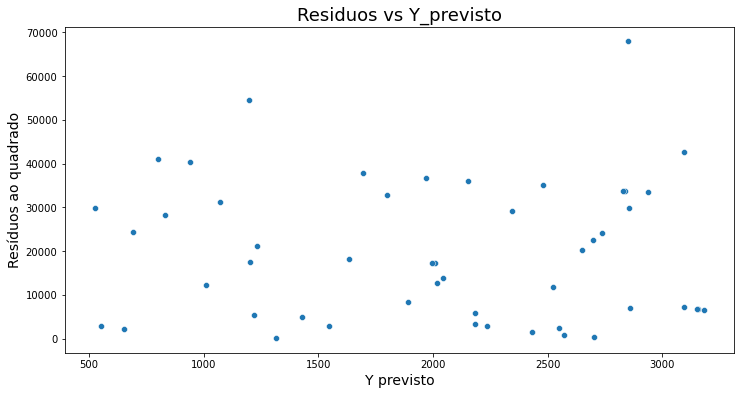

In [46]:
eixo = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos**2)
eixo.figure.set_size_inches(12, 6)
eixo.set_title('Residuos vs Y_previsto', fontsize=18)
eixo.set_xlabel('Y previsto', fontsize=14)
eixo.set_ylabel('Resíduos ao quadrado', fontsize=14)
eixo 

In [59]:
# Soma dos quadrados dos erros - sum of squared residuals
SQE = dataset.Residuos.apply(lambda u: u**2).sum()
print(resultado_regressao.ssr)
print(SQE) 

984986.0375191913
984986.0375191912


In [60]:
# Soma dos quadrados total
SQT = dataset.Y.apply(lambda y: np.square((y - dataset.Y.mean()))).sum()
print(SQT)

-168.3212
481.3904


In [49]:
# Soma dos quadrados da regressão - explained sum of squares
SQR = dataset.Y_previsto.apply(lambda y: np.square(y - dataset.Y.mean())).sum()
print(resultado_regressao.ess)
print(SQR) 

31739163.242480807
31739163.24248078


In [61]:
# Relação entre a soma dos quadrados
R2 = SQR / SQT
print(R2.round(3))
print(resultado_regressao.rsquared.round(3))

961.0


Assinale a alternativa que apresenta o valor do R² obtido de nossa regressão linear.

In [62]:
print(resultado_regressao_ex.rsquared.round(4)) 

0.9968


Assinale as alternativas que apresentam os códigos corretos para obtermos o valor do erro quadrático médio (EQM).

In [63]:
print(resultado_regressao_ex.mse_resid.round(2))

110564.38
